In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Dataset Consolidation

In [3]:
frames = list()
results = pd.read_csv("cncdata/train.csv")
for i in range(1,19):
    exp = '0' + str(i) if i < 10 else str(i)
    frame = pd.read_csv("cncdata/experiment_{}.csv".format(exp))
    row = results[results['No'] == i]
    frame['target'] = 1 if row.iloc[0]['tool_condition'] == 'worn' else 0
    frames.append(frame)
df = pd.concat(frames, ignore_index = True)
df.head()

,X1_ActualPosition,X1_ActualVelocity,X1_ActualAcceleration,X1_CommandPosition,X1_CommandVelocity,X1_CommandAcceleration,X1_CurrentFeedback,X1_DCBusVoltage,X1_OutputCurrent,X1_OutputVoltage,...,S1_DCBusVoltage,S1_OutputCurrent,S1_OutputVoltage,S1_OutputPower,S1_SystemInertia,M1_CURRENT_PROGRAM_NUMBER,M1_sequence_number,M1_CURRENT_FEEDRATE,Machining_Process,target
0,198.0,0.0,0.00,198.0,0.0,0.000000,0.18,0.0207,329.0,2.77,...,2.740000e-19,329.0,0.0,6.960000e-07,12.0,1.0,0.0,50.0,Starting,0
1,198.0,-10.8,-350.00,198.0,-13.6,-358.000000,-10.90,0.1860,328.0,23.30,...,2.740000e-19,328.0,0.0,-5.270000e-07,12.0,1.0,4.0,50.0,Prep,0
2,196.0,-17.8,-6.25,196.0,-17.9,-0.000095,-8.59,0.1400,328.0,30.60,...,2.740000e-19,328.0,0.0,9.100000e-07,12.0,1.0,7.0,50.0,Prep,0
3,194.0,-18.0,0.00,194.0,-17.9,-0.000095,-6.11,0.1300,327.0,30.30,...,2.740000e-19,328.0,0.0,1.070000e-06,12.0,1.0,7.0,50.0,Prep,0
4,193.0,-17.9,-18.80,192.0,-17.9,0.000095,-5.70,0.1140,328.0,30.50,...,2.740000e-19,328.0,0.0,1.960000e-06,12.0,1.0,7.0,50.0,Prep,0


## Variable Statistics

In [4]:
x_cols = ["X1_ActualPosition", "X1_ActualVelocity", "X1_ActualAcceleration", "X1_CommandPosition", "X1_CommandVelocity", "X1_CommandAcceleration", "X1_CurrentFeedback", "X1_DCBusVoltage", "X1_OutputCurrent", "X1_OutputVoltage", "X1_OutputPower"]
df[x_cols].describe()

,X1_ActualPosition,X1_ActualVelocity,X1_ActualAcceleration,X1_CommandPosition,X1_CommandVelocity,X1_CommandAcceleration,X1_CurrentFeedback,X1_DCBusVoltage,X1_OutputCurrent,X1_OutputVoltage,X1_OutputPower
count,25286.000000,25286.000000,25286.000000,25286.000000,25286.000000,25286.000000,25286.000000,2.528600e+04,25286.000000,25286.000000,25286.000000
mean,159.052045,-0.288657,0.094264,159.050700,-0.283076,0.253215,-0.469714,6.603073e-02,326.945859,7.986942,0.000610
std,19.330873,5.658260,93.877623,19.331144,5.664309,72.594951,4.220750,3.700384e-02,1.459937,7.710379,0.001565
min,141.000000,-20.400000,-1280.000000,141.000000,-20.000000,-1000.000000,-23.400000,2.780000e-19,320.000000,0.000000,-0.006060
25%,145.000000,-2.050000,-31.300000,145.000000,-2.050000,0.000000,-3.930000,4.150000e-02,326.000000,2.590000,0.000000
50%,153.000000,0.000000,0.000000,153.000000,0.000000,0.000000,-0.666000,6.680000e-02,327.000000,7.140000,0.000174
75%,162.000000,0.200000,25.000000,162.000000,0.000000,0.000000,3.140000,9.130000e-02,327.000000,10.200000,0.000585
max,198.000000,50.700000,1440.000000,198.000000,50.000000,1000.000000,27.100000,3.800000e-01,331.000000,75.400000,0.038800


In [5]:
y_cols = ["Y1_ActualPosition", "Y1_ActualVelocity", "Y1_ActualAcceleration", "Y1_CommandPosition", "Y1_CommandVelocity", "Y1_CommandAcceleration", "Y1_CurrentFeedback", "Y1_DCBusVoltage", "Y1_OutputCurrent", "Y1_OutputVoltage", "Y1_OutputPower"]
df[y_cols].describe()

,Y1_ActualPosition,Y1_ActualVelocity,Y1_ActualAcceleration,Y1_CommandPosition,Y1_CommandVelocity,Y1_CommandAcceleration,Y1_CurrentFeedback,Y1_DCBusVoltage,Y1_OutputCurrent,Y1_OutputVoltage,Y1_OutputPower
count,25286.000000,25286.000000,25286.000000,25286.000000,25286.000000,25286.000000,25286.000000,2.528600e+04,25286.000000,25286.000000,25286.000000
mean,99.230064,-0.422932,0.928832,99.226271,-0.412075,1.484158,-0.061681,6.398315e-02,325.862058,7.068352,0.000637
std,29.244880,6.006439,85.074580,29.242802,6.004721,81.358073,4.469548,4.777806e-02,1.804164,8.601484,0.002098
min,72.400000,-32.800000,-1260.000000,72.400000,-32.400000,-1000.000000,-27.800000,2.680000e-19,319.000000,0.000000,-0.004920
25%,77.500000,-0.075000,-18.800000,77.500000,0.000000,0.000000,-3.090000,2.190000e-02,325.000000,1.810000,0.000000
50%,90.000000,0.000000,0.000000,90.000000,0.000000,0.000000,0.146000,5.780000e-02,326.000000,4.930000,0.000004
75%,105.000000,0.100000,18.800000,105.000000,0.000000,0.000000,2.900000,9.557500e-02,326.000000,9.610000,0.000506
max,158.000000,50.400000,1460.000000,158.000000,50.000000,1000.000000,30.700000,4.300000e-01,333.000000,76.800000,0.042400


In [6]:
z_cols = ["Z1_ActualPosition", "Z1_ActualVelocity", "Z1_ActualAcceleration", "Z1_CommandPosition", "Z1_CommandVelocity", "Z1_CommandAcceleration", "Z1_CurrentFeedback", "Z1_DCBusVoltage", "Z1_OutputCurrent", "Z1_OutputVoltage"]
df[z_cols].describe()

,Z1_ActualPosition,Z1_ActualVelocity,Z1_ActualAcceleration,Z1_CommandPosition,Z1_CommandVelocity,Z1_CommandAcceleration,Z1_CurrentFeedback,Z1_DCBusVoltage,Z1_OutputCurrent,Z1_OutputVoltage
count,25286.000000,25286.000000,25286.000000,25286.000000,25286.000000,25286.000000,25286.0,25286.0,25286.0,25286.0
mean,47.780638,-0.328759,-0.103658,47.778031,-0.328464,0.134118,0.0,0.0,0.0,0.0
std,34.255650,7.635223,66.442671,34.252517,7.637045,61.988683,0.0,0.0,0.0,0.0
min,27.500000,-51.500000,-1260.000000,27.500000,-50.000000,-1000.000000,0.0,0.0,0.0,0.0
25%,28.500000,0.000000,-6.250000,28.500000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,29.500000,0.000000,0.000000,29.500000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,55.500000,0.000000,6.250000,55.500000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,119.000000,50.900000,1270.000000,119.000000,50.000000,1000.000000,0.0,0.0,0.0,0.0


In [4]:
# Transform process name in number
le = LabelEncoder()
le.fit(df['Machining_Process'])
df['Machining_Process'] = le.transform(df['Machining_Process'])
# Create np arrays and split train/test sets
y = np.array(df['target'])
x = df.drop('target', axis=1).values

# Exploratory Visualization

## Variable Histograms

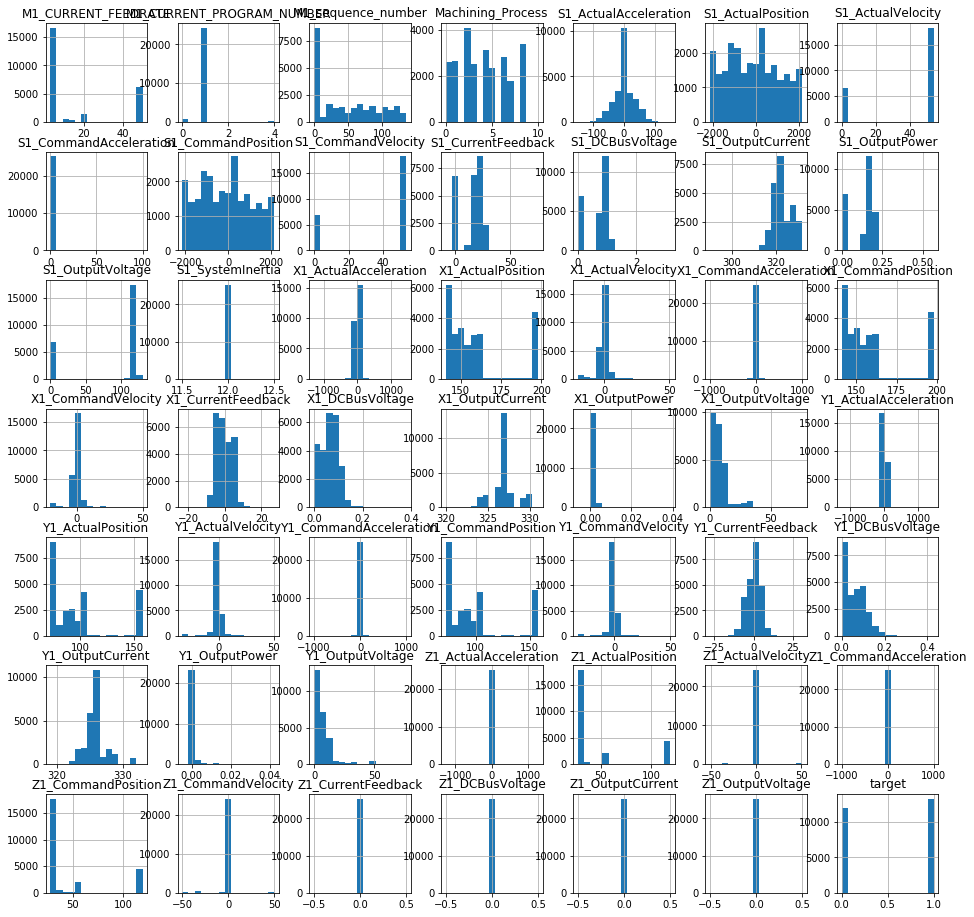

In [7]:
histograms = df.hist(figsize=(16, 16), bins=15)

## Scatter Plots

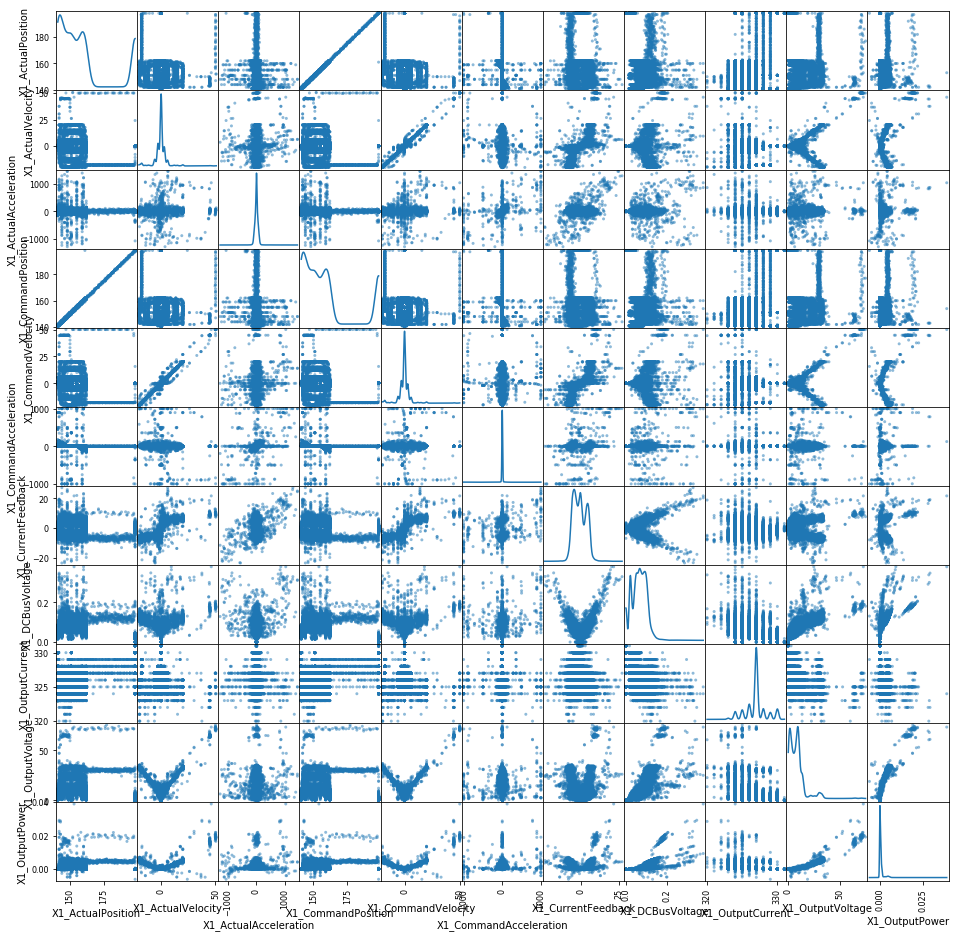

In [8]:
x_scatter = pd.plotting.scatter_matrix(df[x_cols], diagonal="kde", figsize=(16, 16))

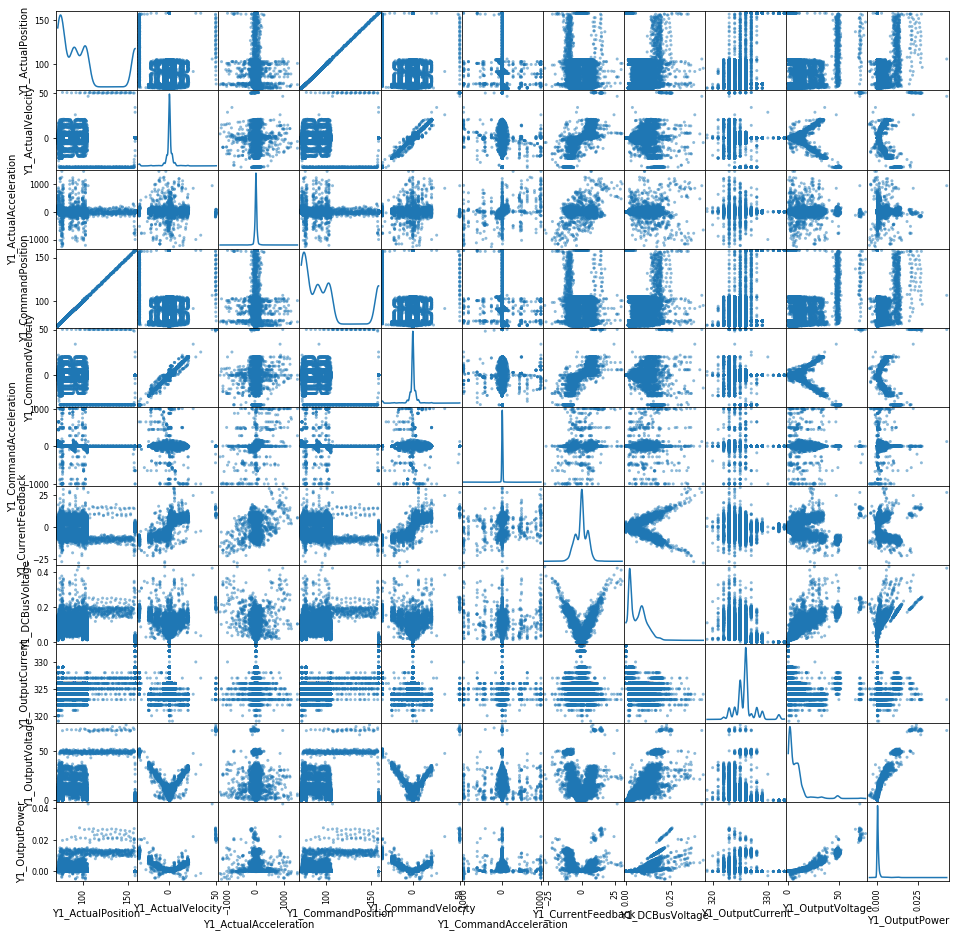

In [9]:
y_scatter = pd.plotting.scatter_matrix(df[y_cols], diagonal="kde", figsize=(16, 16))

## Correlation

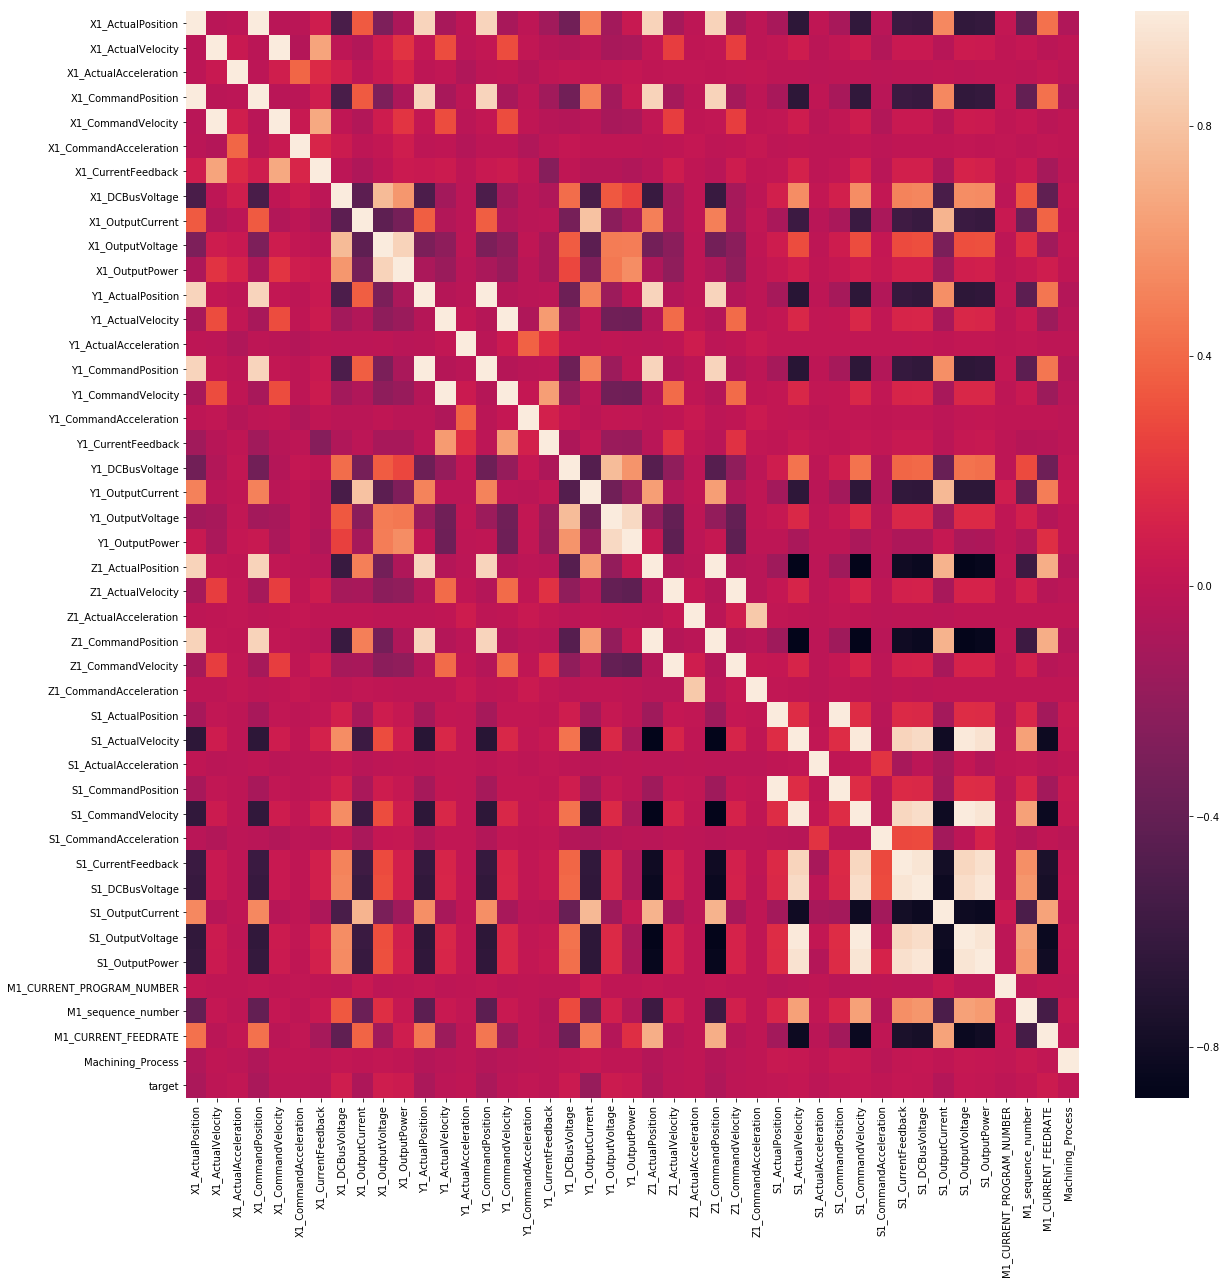

In [10]:
df_correlation=df.corr()
df_correlation.dropna(thresh=1,inplace=True)
df_correlation.drop(columns=['Z1_CurrentFeedback','Z1_DCBusVoltage','Z1_OutputCurrent','Z1_OutputVoltage','S1_SystemInertia','target'],inplace=True)
plt.figure(figsize=(20,20))
sns.heatmap(df_correlation)

## Training Set and Test Set Preparation

In [16]:
x=df.drop(columns=['target','Machining_Process'],axis=1)
y=np.array(df['target'])
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)
# Target distribution (count values)
print("Target distribution - 1 worn; 0 unworn:")
print(df['target'].value_counts())

print("Training set row count")
print(x_train.shape[0])
print("Test set row count")
print(x_test.shape[0])

Target distribution - 1 worn; 0 unworn:
1    13308
0    11978
Name: target, dtype: int64
Training set row count
20228
Test set row count
5058


# Train Models

## Logistic Regression Classifier

In [17]:
from datetime import datetime

lm = LogisticRegression()
t1 = datetime.now()
lm.fit(x_train, y_train)
t2 = datetime.now()
delta = t2 - t1

lm_pred = lm.predict(x_test)

print("Trained on {0} observations and scoring with {1} test samples.".format(len(x_train), len(x_test)))
print("Accuracy: {0:0.4f}".format(accuracy_score(y_test, lm_pred)))
print("F1 Score: {0:0.4f}".format(f1_score(y_test, lm_pred)))
print("Area under ROC curve: {0:0.4f}".format(roc_auc_score(y_test, lm_pred)))
print("training time (seconds) : ", delta.seconds + delta.microseconds/1E6)

Trained on 20228 observations and scoring with 5058 test samples.
Accuracy: 0.5757
F1 Score: 0.6067
Area under ROC curve: 0.5730
training time (seconds) :  8.40406


In [10]:
cnf_matrix = confusion_matrix(y_test, lm_pred)
cnf_matrix

array([[1238, 1192],
       [ 924, 1704]], dtype=int64)

## Decision Tree Classifier

In [39]:
model = DecisionTreeClassifier()
t1 = datetime.now()
model.fit(x_train, y_train)
t2 = datetime.now()
delta = t2 - t1

dt_pred = model.predict(x_test)

print("Trained on {0} observations and scoring with {1} test samples.".format(len(x_train), len(x_test)))
print("Accuracy: {0:0.4f}".format(accuracy_score(y_test, dt_pred)))
print("F1 Score: {0:0.4f}".format(f1_score(y_test, dt_pred)))
print("Area under ROC curve: {0:0.4f}".format(roc_auc_score(y_test, dt_pred)))
print("training time (seconds) : ", delta.seconds + delta.microseconds/1E6)

Trained on 20228 observations and scoring with 5058 test samples.
Accuracy: 0.9871
F1 Score: 0.9879
Area under ROC curve: 0.9872
training time (seconds) :  0.349996


In [15]:
cnf_matrix = confusion_matrix(y_test, dt_pred)
cnf_matrix

array([[2320,   16],
       [  32, 2690]], dtype=int64)

## SVM Classifier

In [16]:
model = svm.SVC(kernel='linear')
t1 = datetime.now()
model.fit(x_train, y_train)
t2 = datetime.now()
delta = t2 - t1

svm_pred = model.predict(x_test)

print("Trained on {0} observations and scoring with {1} test samples.".format(len(x_train), len(x_test)))
print("Accuracy: {0:0.4f}".format(accuracy_score(y_test, svm_pred)))
print("F1 Score: {0:0.4f}".format(f1_score(y_test, svm_pred)))
print("Area under ROC curve: {0:0.4f}".format(roc_auc_score(y_test, svm_pred)))
print("training time (seconds) : ", delta.seconds + delta.microseconds/1E6)

Trained on 20228 observations and scoring with 5058 test samples.
Accuracy: 0.5708
F1 Score: 0.5950
Area under ROC curve: 0.5695
training time (seconds) :  30474.12893


In [17]:
cnf_matrix = confusion_matrix(y_test, svm_pred)
cnf_matrix

array([[1292, 1044],
       [1127, 1595]], dtype=int64)

## Gaussian Naive Bayes Classifier

In [18]:
model = GaussianNB()
t1 = datetime.now()
model.fit(x_train, y_train)
t2 = datetime.now()
delta = t2 - t1

nb_pred = model.predict(x_test)

print("Trained on {0} observations and scoring with {1} test samples.".format(len(x_train), len(x_test)))
print("Accuracy: {0:0.4f}".format(accuracy_score(y_test, nb_pred)))
print("F1 Score: {0:0.4f}".format(f1_score(y_test, nb_pred)))
print("Area under ROC curve: {0:0.4f}".format(roc_auc_score(y_test, nb_pred)))
print("training time (seconds) : ", delta.seconds + delta.microseconds/1E6)

Trained on 20228 observations and scoring with 5058 test samples.
Accuracy: 0.5579
F1 Score: 0.6733
Area under ROC curve: 0.5374
training time (seconds) :  0.036996


In [19]:
cnf_matrix = confusion_matrix(y_test, nb_pred)
cnf_matrix

array([[ 488, 1848],
       [ 386, 2336]], dtype=int64)

## Random Forest Classifier

In [32]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
t1 = datetime.now()
model.fit(x_train, y_train)
t2 = datetime.now()
delta = t2 - t1

rf_pred = model.predict(x_test)

print("Trained on {0} observations and scoring with {1} test samples.".format(len(x_train), len(x_test)))
print("Accuracy: {0:0.4f}".format(accuracy_score(y_test, rf_pred)))
print("F1 Score: {0:0.4f}".format(f1_score(y_test, rf_pred)))
print("Area under ROC curve: {0:0.4f}".format(roc_auc_score(y_test, rf_pred)))
print("training time (seconds) : ", delta.seconds + delta.microseconds/1E6)

Trained on 20228 observations and scoring with 5058 test samples.
Accuracy: 0.9881
F1 Score: 0.9889
Area under ROC curve: 0.9881
training time (seconds) :  0.43104


In [37]:
cnf_matrix = confusion_matrix(y_test, rf_pred)
cnf_matrix

array([[2341,   25],
       [  23, 2669]], dtype=int64)

## Refinement

In [43]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=40, min_samples_leaf=4, n_estimators=200)
t1 = datetime.now()
model.fit(x_train, y_train)
t2 = datetime.now()
delta = t2 - t1

rf_pred = model.predict(x_test)

print("Trained on {0} observations and scoring with {1} test samples.".format(len(x_train), len(x_test)))
print("Accuracy: {0:0.4f}".format(accuracy_score(y_test, rf_pred)))
print("F1 Score: {0:0.4f}".format(f1_score(y_test, rf_pred)))
print("Area under ROC curve: {0:0.4f}".format(roc_auc_score(y_test, rf_pred)))
print("training time (seconds) : ", delta.seconds + delta.microseconds/1E6)

Trained on 20228 observations and scoring with 5058 test samples.
Accuracy: 0.9927
F1 Score: 0.9931
Area under ROC curve: 0.9925
training time (seconds) :  8.14241


## Feature Importance

C:\Users\balasubs\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':
C:\Users\balasubs\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.


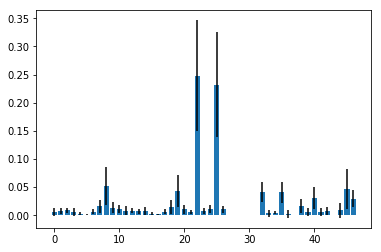

In [45]:
importance = model.feature_importances_
importance = pd.DataFrame(importance, index=x_train.columns, 
                          columns=["Importance"])

importance["Std"] = np.std([tree.feature_importances_
                            for tree in model.estimators_], axis=0)

x = range(importance.shape[0])
y = importance.ix[:, 0]
yerr = importance.ix[:, 1]

plt.bar(x, y, yerr=yerr, align="center")

plt.show()

In [46]:
# Find the index of most and least important feature and display that column
print("Most important feature = {}".format(x_train.columns[np.argmax(model.feature_importances_)]))
print("Least important feature = {}".format(x_train.columns[np.argmin(model.feature_importances_)]))

# Get the indices based on feature importance in ascending order 
feature_indices = np.argsort(model.feature_importances_)

print("\nTop 5 most important features:-")
# Reverse the array to get important features at the beginning
for index in feature_indices[::-1][:5]:
    print(x_train.columns[index])
    
print("\nTop 5 least important features:-")
for index in feature_indices[:5]:
    print(x_train.columns[index])

Most important feature = Z1_ActualPosition
Least important feature = Z1_CurrentFeedback

Top 5 most important features:-
Z1_ActualPosition
Z1_CommandPosition
X1_OutputCurrent
M1_sequence_number
Y1_OutputCurrent

Top 5 least important features:-
Z1_DCBusVoltage
S1_SystemInertia
Z1_OutputCurrent
Z1_OutputVoltage
Z1_CurrentFeedback


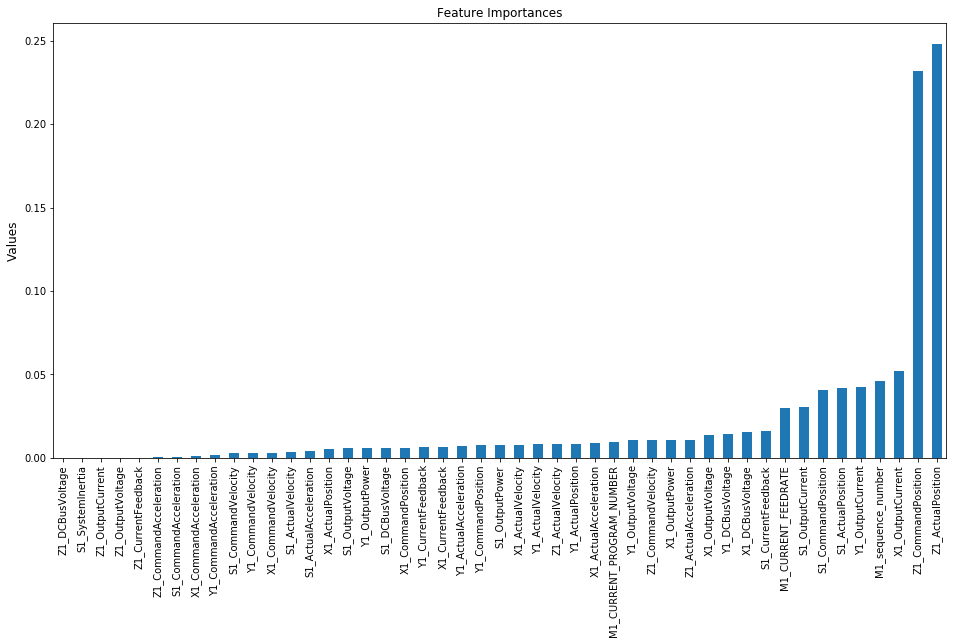

In [47]:
# Plot feature importance

fi = pd.DataFrame(index=x_train.columns[feature_indices], data=np.sort(model.feature_importances_))

ax = fi.plot(kind="bar", title="Feature Importances", figsize=(16, 8))
ax.set_ylabel("Values", fontsize="large")
ax.legend_.remove()